# 3주차 Neural Network 과제는 인공신경망을 논리게이트부터 차례대로 쌓아올려 직접 짜보는 것입니다.
# 중간 중간 남겨진 주석을 따라 코드를 완성시켜 주세요

## 논리 게이트 구현

### AND, NAND, OR gate

In [115]:
## AND gate 구현해주세요
# w1, w2 => 가중치(weight)를 의미하는 변수
# theta : threshold

def AND(x1, x2):
    w1, w2, theta = 0.3, 0.4, 0.7
    result = x1*w1 + x2*w2
    print(result)
    if result <= theta:
        return 0
    else:
        return 1


def NAND(x1, x2):
    w1, w2, theta = 0.3, 0.4, 0.7
    result = x1 * w1 + x2*w2
    print(result)
    if result <= theta:
        return 1
    else:
        return 0

    
def OR(x1, x2):
    w1, w2, theta = 0.3, 0.4, 0.7
    result = x1 * w1 + x2*w2
    print(result)
    if result >= theta:
        return 1
    else:
        return 0


# 위 논리 게이트를 조합하여 XOR gate 구현해주세요


### XOR gate
먼저 NAND 게이트와 OR 게이트를 이용하여 각각 입력값 x1과 x2의 XOR 결과를 계산하고, 그 결과를 다시 AND 게이트로 처리하여 최종 XOR 결과를 반환함

In [116]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)

## 활성함수 구현

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 입력할 샘플 데이터를 만들고 확인합니다.
x = np.array([-1, 1, 2])
print("input : ", x)

# 입력 값이 임계값(0)을 넘기는지 판단합니다.
y = x>0
print("Logic : ", y)

# 논리(boolean)형태를 정수형으로 바꾸어 0과 1로 나타냅니다.
y = y.astype(np.int)
print("Boolean : ", y)

input :  [-1  1  2]
Logic :  [False  True  True]
Boolean :  [0 1 1]


C:\Users\MJHwang\AppData\Local\Temp\ipykernel_13160\333860784.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [118]:
# STEP 함수 구현
def step_function(x):
    return np.where(x <= 0, 0, 1) # x가 0보다 작으면 0, 크면 1 반환

# 함수가 제대로 만들어 졌는지 값을 출력해봅니다.
print(step_function(-1))	# 0
print(step_function(0.5))	# 1
print(step_function(500000))	# 1

0
1
1


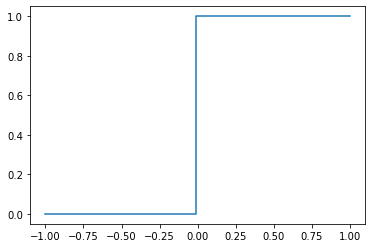

In [119]:
# 구현한 계단 함수의 값을 바탕으로 그래프를 그려봅시다.
x = np.linspace(-1, 1, 100)
plt.step(x, step_function(x))
plt.show()

[0.00669285 0.26894142 0.5        0.52497919 0.99330715 1.        ]


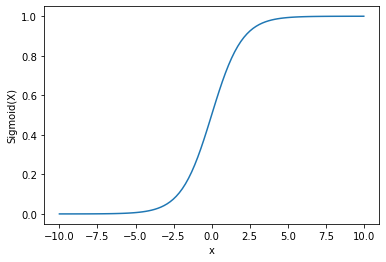

In [120]:
# Sigmoid 함수 구현
def sigmoid(x):
    sig = 1 / (1+np.exp(-x))
    return sig

x = np.array([-5, -1, 0, 0.1, 5, 500000])
print(sigmoid(x))

x = np.linspace(-10, 10, 100)

plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

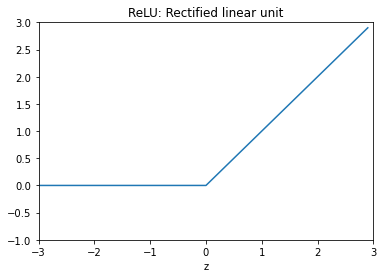

<Figure size 432x288 with 0 Axes>

In [121]:
# ReLU 함수 구현
# ReLU: 0보다 크면 그대로 반환되고, 0보다 작으면 0으로 반환됨
def ReLU(x):
    return np.maximum(0, x)

x = np.arange(-3, 3, .1)
y = ReLU(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_ylim([-1.0, 3.0])
ax.set_xlim([-3.0, 3.0])
#ax.grid(True)
ax.set_xlabel('z')
ax.set_title('ReLU: Rectified linear unit')

plt.show()
fig = plt.gcf()

## 신경망 구현

In [122]:
def init_network():
    """
    W1,W2 : 가중치
    B1,B2 : 편향
    값은 일단 마음대로 지정한 값이니 신경쓰지 않으셔도 됩니다.
    """
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.7], [0.1, 0.3, 0.3, 0.7], [0.2, 0.1, 0.6, 0.8]]) # 3 x 4
    network['B1'] = np.array([0.11, 0.12, 0.13, 0.14]) # 4개
    network['W2'] = np.array([[0.1, 0.5], [0.2, 0.6], [0.3, 0.4], [0.35, 0.35]]) # 4 x 2
    network['B2'] = np.array([0.1, 0.5]) # 2개

    return network

In [123]:
# 순전파 함수 정의
def forward(network, x):
  W1, W2 = network['W1'], network['W2']
  b1, b2 = network['B1'], network['B2']

 # 아래 빈칸 채워주세요
  a1 = np.matmul(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.matmul(z1, W2) + b2
  y = a2
  return y

In [124]:
# 네트워크 제작
network = init_network()

# 샘플 입력 데이터
x = np.array([1, 0.5, 0.7])

# 순전파 실행
y = forward(network, x)
print(y)

[0.81956037 1.7977893 ]


## 직접 신경망 만들어보기

In [125]:
# 랜덤 시드(Random Seed)를 고정합니다.
np.random.seed(405)

# X: 입력(inputs)
X = np.array([
    [0, 0]
    ,[0, 1]
    ,[1, 0]
    ,[1, 1]
])

# 편향(bias)
b = 1

# Y: 타겟값(target, correct outputs)
Y= np.array([[0],[1],[1],[1]])

In [126]:
# 시그모이드 함수
# net: 입력과 가중치의 가중합
def sigmoid(net):
    sig = 1 / (1+np.exp(-net))
    return sig
#위에서 구현한 코드 그대로


# 시그모이드 함수의 도함수 구현
# https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
def sigmoid_prime(net):
    sig = sigmoid(net)
    return sig *(1-sig)

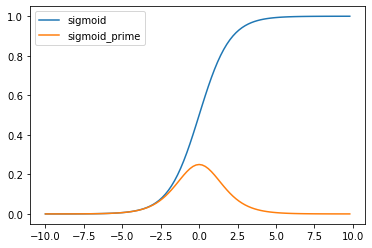

In [127]:
# 시그모이드 함수가 잘 생성되었는지 그래프를 출력해봅시다.
x_range = np.arange(-10., 10., 0.2)
y_range = np.array([sigmoid(x) for x in x_range])
y_prime = np.array([sigmoid_prime(x) for x in x_range])

plt.plot(x_range, y_range, label='sigmoid')
plt.plot(x_range, y_prime, label='sigmoid_prime')
plt.legend()
plt.show();

In [128]:
# 초기 가중치
W = ([0.40316676, -0.44345216])
W = np.reshape(W, (-1, 1)) # 차원 조정


# 입력 데이터와 가중치 연산
Z = np.dot(X, W)+b             
#Feedforward 연산 참고하여 코드 작성

"""
array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])
"""
Z

array([[1.        ],
       [0.55654784],
       [1.40316676],
       [0.9597146 ]])

In [129]:
# A: 출력(activated outputs)
A = sigmoid(Z)

"""
array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])
"""
A

array([[0.73105858],
       [0.6356534 ],
       [0.80268592],
       [0.72306466]])

## 미분한 값을 코드로 구현
=> 출력 오차를 줄이기 위한 역전파(경사하강법 이용)

경사 하강법(Gradient descent) : 손실 값이 최소가 되는 가중치(weight)를 찾는 방법
역전파 알고리즘 : 경사 하강법에 필요한 미분값을 빠르고 효율적으로 찾는 알고리즘

da = ∂E/∂A (MSE를 미분하여 나오는 값)
dz = ∂E/∂z
dw, db = 각각 가중치(weight), 편향(bias) 업데이트 값

In [130]:
def backpropagation(Y, A, Z):
    da = A - Y
    dz = da * sigmoid_prime(Z)
    dw = np.matmul(X.T, dz)
    db = np.sum(dz)
    print("dz : \n", dz, "\n")
    print("dw : \n", dw, "\n")
    print("db : \n", db, "\n")
    return dw,db

"""
dz :
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]]

dw :
 [[-0.08670498]
 [-0.13983613]]

db :
 [[-0.10753744]]
"""
backpropagation(Y, A, Z)

# 왜 db값이 다르게 나올까요.....?

dz : 
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]] 

dw : 
 [[-0.08670498]
 [-0.13983613]] 

db : 
 -0.02735213564501296 



(array([[-0.08670498],
        [-0.13983613]]),
 -0.02735213564501296)

In [131]:
print("기존 가중치: \n", W, "\n")
"""
기존 가중치:
 [[ 0.40316676]
 [-0.44345216]]
"""

기존 가중치: 
 [[ 0.40316676]
 [-0.44345216]] 



'\n기존 가중치:\n [[ 0.40316676]\n [-0.44345216]]\n'

In [132]:
# 가중치 업데이트(batch)

def backpropagation(Y, A, Z):
    da = A - Y
    dz = da * sigmoid_prime(Z)
    dw = np.matmul(X.T, dz)
    db = np.sum(dz)
    print("dz : \n", dz, "\n")
    print("dw : \n", dw, "\n")
    print("db : \n", db, "\n")
    return dw,db

dw, db = backpropagation(Y, A, Z)

W -= dw
b -= db # 마이너스인것 같아 수정했습니다

print("업데이트 후 가중치: \n", W, "\n")
print("업데이트 후 bias: \n", b, "\n")

"""
업데이트 후 가중치:
 [[ 0.31646178]
 [-0.58328829]]

업데이트 후 bias:
 [[0.89246256]]
"""

dz : 
 [[ 0.14373484]
 [-0.084382  ]
 [-0.03125085]
 [-0.05545413]] 

dw : 
 [[-0.08670498]
 [-0.13983613]] 

db : 
 -0.02735213564501296 

업데이트 후 가중치: 
 [[ 0.48987174]
 [-0.30361603]] 

업데이트 후 bias: 
 1.027352135645013 



'\n업데이트 후 가중치:\n [[ 0.31646178]\n [-0.58328829]]\n\n업데이트 후 bias:\n [[0.89246256]]\n'

In [133]:
## 최적 가중치 찾기
# 이미 입력 데이터와 타겟 출력은 윗 부분에서 선언함

# 가중치 초기화
# 아래 각주 코드 하나씩 실행하여 결과값 달라지는 확인해보시기 바랍니다

# W = 2 * np.random.random((2,1)) - 1
W =  [-0.79003947, 0.6826574 ]
# W = np.zeros((2,1))

b = 0

print('학습 전 가중치: \n', W)

# 가중치 업데이트 10,000회 (10,000 epoch)

for iteration in range(1000):

    # 순방향 전파
    Z = np.dot(X, W) + b
    A = sigmoid(Z)

    # 역방향 전파(기울기 계산)
    backpropagation(Y, A, Z)

    W -= dw
    b -= db

print('학습 후 가중치: \n', W, "\n")
print('학습 후 bias: \n', b, "\n")
print('학습 후 예측값: \n', A.round(3), "\n")

"""
학습 후 가중치:
 [[5.92060487]
 [5.92082351]]

학습 후 bias:
 [[-2.59025899]]

학습 후 예측값:
 [[0.07 ]
 [0.965]
 [0.965]
 [1.   ]]
"""

학습 전 가중치: 
 [-0.79003947, 0.6826574]
dz : 
 [[ 0.125       0.14814271  0.06702585  0.1179547 ]
 [-0.125      -0.07485244 -0.14769035 -0.131326  ]
 [-0.125      -0.07485244 -0.14769035 -0.131326  ]
 [-0.125      -0.07485244 -0.14769035 -0.131326  ]] 

dw : 
 [[-0.25       -0.14970487 -0.29538071 -0.26265199]
 [-0.25       -0.14970487 -0.29538071 -0.26265199]] 

db : 
 -0.9784830958042419 

dz : 
 [[ 0.12668571  0.12668571]
 [-0.14790245 -0.06282356]
 [-0.14813357 -0.06655076]
 [-0.13099985 -0.02281093]] 

dw : 
 [[-0.27913342 -0.08936169]
 [-0.2789023  -0.08563448]] 

db : 
 -0.3258497118432347 

dz : 
 [[ 0.12832214  0.12832214]
 [-0.14532155 -0.05180882]
 [-0.14728835 -0.05867744]
 [-0.14152566 -0.01537541]] 

dw : 
 [[-0.28881401 -0.07405285]
 [-0.28684721 -0.06718423]] 

db : 
 -0.30335295000156703 

dz : 
 [[ 0.12990685  0.12990685]
 [-0.13997335 -0.04203238]
 [-0.1451327  -0.05132429]
 [-0.1473865  -0.01013442]] 

dw : 
 [[-0.2925192  -0.0614587 ]
 [-0.28735985 -0.0521668 ]] 

db 

dw : 
 [[-3.68087613e-19 -1.93545115e-20]
 [-4.54383881e-28 -2.38630424e-29]] 

db : 
 0.010041092996103741 

dz : 
 [[ 4.88709092e-03  4.88709092e-03]
 [-3.23482275e-28 -1.77986742e-29]
 [-2.93009902e-19 -1.54068335e-20]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-2.93009902e-19 -1.54068335e-20]
 [-3.23482275e-28 -1.77986742e-29]] 

db : 
 0.009774181845471602 

dz : 
 [[ 4.75713041e-03  4.75713041e-03]
 [-2.34735423e-28 -1.26217745e-29]
 [-2.33245755e-19 -1.22643497e-20]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-2.33245755e-19 -1.22643497e-20]
 [-2.34735423e-28 -1.26217745e-29]] 

db : 
 0.009514260812194473 

dz : 
 [[ 4.63057620e-03  4.63057620e-03]
 [-1.65858005e-28 -8.33234331e-30]
 [-1.85671350e-19 -9.76285974e-21]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-1.85671350e-19 -9.76285974e-21]
 [-1.65858005e-28 -8.33234331e-30]] 

db : 
 0.00926115239330812 

dz : 
 [[ 4.50734165e-03  4.50734165e-03]
 [-1.18378440e-28 -5.96576060e-30]
 [-1.47800628e-19 -7.77154576e-21]

 0.0029642712023472025 

dz : 
 [[ 1.44231897e-03  1.44231897e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.02037677e-23 -5.36593098e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-1.02037677e-23 -5.36593098e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

db : 
 0.0028846379460549117 

dz : 
 [[ 1.40356744e-03  1.40356744e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-8.12343796e-24 -4.27032545e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-8.12343796e-24 -4.27032545e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

db : 
 0.002807134885526863 

dz : 
 [[ 1.36585276e-03  1.36585276e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-6.46611061e-24 -3.39992936e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-6.46611061e-24 -3.39992936e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

db : 
 0.002731705521761924 

dz : 
 [[ 1.32914741e-03  1.32914741e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-5.14768837e-24 -2.70660592e-25]
 [ 0.00000000e+00  0.00000000e+00]] 

dw : 
 [[-5.14768837e-24 -2.70660592e-25]
 [

dz : 
 [[6.26674039e-06 6.26674039e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.2533480773322903e-05 

dz : 
 [[6.09765772e-06 6.09765772e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.2195315432975563e-05 

dz : 
 [[5.93313698e-06 5.93313698e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.1866273955865895e-05 

dz : 
 [[5.77305509e-06 5.77305509e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.1546110184173137e-05 

dz : 
 [[5.6172923e-06 5.6172923e-06]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.1234584601279301e-05 

dz : 
 [[1.35466133e-06 1.35466133e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.7093226685456215e-06 

dz : 
 [[1.31811075e-06 1.31811075e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.6362214945124694e-06 

dz : 
 [[1.28254634e-06 1.28254634e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.565092681268239e-06 

dz : 
 [[1.24794151e-06 1.24794151e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.4958830116017055e-06 

dz : 
 [[1.21427035e-06 1.21427035e-06]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.42854070620354

dz : 
 [[4.8393038e-09 4.8393038e-09]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 9.678607599400045e-09 

dz : 
 [[4.70873247e-09 4.70873247e-09]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 9.417464941337403e-09 

dz : 
 [[4.58168388e-09 4.58168388e-09]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 9.163367758323572e-09 

dz : 
 [[4.45806343e-09 4.45806343e-09]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 8.916126868369266e-09 

dz : 
 [[4.33777832e-09 4.33777832e-09]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 8.675556642198168e-09 

dz 

 [[1.0750889e-09 1.0750889e-09]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.150177808952473e-09 

dz : 
 [[1.04608144e-09 1.04608144e-09]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.0921628830022e-09 

dz : 
 [[1.01785669e-09 1.01785669e-09]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 2.0357133715035456e-09 

dz : 
 [[9.90393543e-10 9.90393543e-10]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.980787085982271e-09 

dz : 
 [[9.63671141e-10 9.63671141e-10]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 1.9273422820533153e-09 

dz : 
 [[

 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 5.68523006446818e-12 

dz : 
 [[2.76600964e-12 2.76600964e-12]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 5.5320192870716276e-12 

dz : 
 [[2.69140266e-12 2.69140266e-12]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 5.382805312563635e-12 

dz : 
 [[2.61879407e-12 2.61879407e-12]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 5.237588140944206e-12 

dz : 
 [[2.54796184e-12 2.54796184e-12]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]] 

dw : 
 [[0. 0.]
 [0. 0.]] 

db : 
 5.0959236830034996e-12 

dz : 
 [[2.47935006e-12 2.47935006e-12]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000

'\n학습 후 가중치:\n [[5.92060487]\n [5.92082351]]\n\n학습 후 bias:\n [[-2.59025899]]\n\n학습 후 예측값:\n [[0.07 ]\n [0.965]\n [0.965]\n [1.   ]]\n'

## IRIS DATA PERCEPTRON 학습예제

In [134]:
### 1. 필요한 패키지를 import 하고 Iris 데이터셋 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# iris 데이터를 DataFrame 형태로 불러옵니다.
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

### 아래 제공된 전처리 코드를 참고하여 자신만의 전처리 코드를 작성해봅니다.

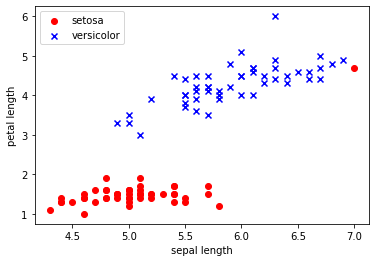

In [135]:

### 2. 데이터 전처리(Preprocessing) 및 시각화(Visualization)
# 50 setosa, 50 versicolor 데이터만 사용하여 이진 분류(Binary Classification) 문제를 풀어보겠습니다.

y = df.iloc[0:100, 4].values
y
"""
array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)
"""

# 타겟 레이블을 setosa = -1, versicolor = 1 로 바꾸기
y = np.where(y == 'Iris-setosa', -1, 1)
y
"""
array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
"""

# 두 개의 특성(sepal length, petal length)만 사용
X = df.iloc[0:100, [0, 2]].values
X.shape
"""
(100, 2)
"""

# 두 특성에 따라 데이터 시각화
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

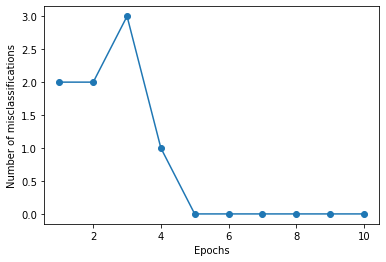

In [136]:
### 퍼셉트론(Perceptron)을 구현
class Perceptron:
    # niter = iteration 의 횟수입니다.
    # iteration에 대해서는 다음 강의에서 자세히 배울 것이므로 반복 횟수 정도로만 이해하셔도 충분합니다.
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """
        퍼셉트론을 학습시키는 코드입니다.

        X : 학습되는 데이터에 해당하는 벡터입니다.
        X.shape -> [샘플의 수, 특성의 수] 가 되어야 합니다.

        y : 타겟값입니다.
        y.shape -> [샘플의 수] 가 되어야 합니다.
        """

        # 초기 가중치는 [0, 0, 0] 으로 설정합니다.
        self.weight = np.zeros(1 + X.shape[1])

        # 오분류(mis-classification)된 데이터의 수
        self.errors = []

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        """
        입력값을 받아 가중치, 편향과 연산해줍니다.
        """
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """
        학습 후 가중치를 바탕으로 데이터의 클래스를 예측합니다.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


### 4. 퍼셉트론에 데이터 넣어 가중치를 학습
# 학습률(learning rate): 0.1, iteration(epoch): 10
# 퍼셉트론을 학습시키고 오분류(mis-classification)의 변화를 살펴보겠습니다.
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

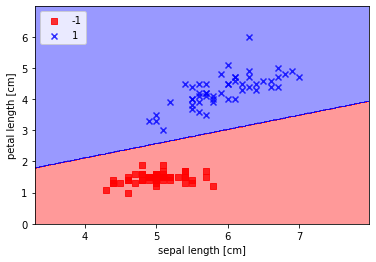

In [137]:
### 데이터가 잘 분류 되었는지 확인
# 퍼셉트론의 결정 경계를 확인해 보겠습니다.
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 그래프 요소를 세팅하여줍니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계면을 그려보겠습니다.
    x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 데이터를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, color=cmap(idx),
        marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## 고생하셨습니다